In [184]:
from collections import defaultdict
from types import *
import pandas as pd
import numpy as np
from math import floor
from scipy import stats
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 8.0
matplotlib.rcParams['figure.figsize'] = [10, 10]

class Values():
    def __init__(self, abuser, date):
        self.abuser = abuser
        self.date = date


class Date():
    '''to keep the same format all over the site'''
    def __init__(self):
        self.format = '%Y-%m-%d'
    def get_now_str(self):
        return datetime.now().strftime(self.format)
    def get_n_days_ago_str(self, sub_days=0):
        return (datetime.now() - timedelta(days=sub_days)).strftime(self.format)
    def get_utcnow_str(self):
        return datetime.utcnow().strftime(self.format)
    def get_utcnow_number(self):
        return datetime.utcnow().strftime('%Y%m%d%H%M%S%f')
    def get_str(self, obj):
        return obj.strftime(self.format)
    def get_obj(self, date_str):
        return datetime.strptime(date_str, self.format)
    def get_epoch(self, add_days=0):
        x = datetime.utcnow() + timedelta(days=add_days)
        return calendar.timegm(x.utctimetuple()) * 1000


def dateDiff(start, end):
    start_dt = Date().get_obj(start)
    end_dt = Date().get_obj(end)
    y = (end_dt - start_dt)
    return y.days

def longestLength(lists):
    maxlength = 0
    for l in lists:
        if len(l) > maxlength:
            maxlength = len(l)
    return maxlength

def getColorList(count):
    redAbuse = [1,0,0]
    greenReal = [0,1,0]
    
    masterColorList = []
    f = lambda x: masterColorList.extend(x)
    [f([redAbuse, greenReal]) for i in range(count)]
    
    return (masterColorList)
    
def getLineValues(count):
    linelength = 0.9
    
    masterLOffsetList = []
    f = lambda x: masterLOffsetList.extend(x)
    [ f([i,i]) for i in range(count)]
    
    offsetList = np.array(masterLOffsetList)
    lengthList = [linelength] * count * 2
    
    return offsetList, lengthList

def generateDict(df_data):
    result ={}
    for index, row in df_data.iterrows():
        playerid = row['playerid']
        abuser = row['abuser']
        date = row['date']
        value = Values(abuser, date)
        if not result.get(playerid):
            #print(result.get(playerid))
            result[playerid] = []
            result[playerid].append(value)
        else:
            result[playerid].append(value)
    return result

def daysSinceFirstDay(playerdata):
    result = []
    if not playerdata:
        return result
    first_item = playerdata[0]
    for item in playerdata:
        result.append(dateDiff(first_item.date, item.date))
    return result

def getRandomSample(df, isAbuser, count):
    return df.loc[df['isAbuser'] == isAbuser][["playerId"]].sample(n=count).values.flatten().tolist()



In [185]:
def mySinglePlot(data):    
    total = len(data)
    halfTotal = int(floor(total/2))
    maxPatternLength = longestLength(data)
    colors1 = getColorList(halfTotal)
    lineoffsets1, linelengths1 = getLineValues(halfTotal)
    
    #print(lineoffsets1, linelengths1, colors1, data1)
    try:
        plt.eventplot(data, colors=colors1, lineoffsets=lineoffsets1,
                        linelengths=linelengths1, orientation="vertical")
    except:
        pass 
    plt.show()




def myPlot(list_of_data):    
    first_data = list_of_data[0]
    total = len(first_data)
    halfTotal = int(floor(total/2))
    maxPatternLength = longestLength(first_data)
    colors1 = getColorList(halfTotal)
    lineoffsets1, linelengths1 = getLineValues(halfTotal)

    # 9 plots
    data1 = list_of_data[0]
    data2 = list_of_data[1]
    data3 = list_of_data[2]
    data4 = list_of_data[3]
    data5 = list_of_data[4]
    data6 = list_of_data[5]
    data7 = list_of_data[6]
    data8 = list_of_data[7]
    data9 = list_of_data[8]
        
    fig, axs = plt.subplots(3, 3)
    
    #print(lineoffsets1, linelengths1, colors1, data1)
    try:
        axs[0,0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                        linelengths=linelengths1, orientation="vertical")
    except:
        pass
    try:
        axs[0,1].eventplot(data2, colors=colors1, lineoffsets=lineoffsets1,
                           linelengths=linelengths1, orientation="vertical")
    except:
        pass
    try:
        axs[0,2].eventplot(data3, colors=colors1, lineoffsets=lineoffsets1,
                           linelengths=linelengths1, orientation="vertical")
    except:
        pass
    try:
        axs[1,0].eventplot(data4, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation="vertical")
    except:
        pass
    try:
        axs[1,1].eventplot(data5, colors=colors1, lineoffsets=lineoffsets1,
                        linelengths=linelengths1, orientation="vertical")
    except:
        pass
    try:
        axs[1,2].eventplot(data6, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation="vertical")
    except:
        pass
    try:
        axs[2,0].eventplot(data7, colors=colors1, lineoffsets=lineoffsets1,
                        linelengths=linelengths1, orientation="vertical")
    except:
        pass
    try:
        axs[2,1].eventplot(data8, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation="vertical")
    except:
        pass
    try:
        axs[2,2].eventplot(data9, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation="vertical")
    except:
        pass
    plt.show()


    

In [186]:
dfAbuser = pd.read_csv('../data/DivideBy1_plus_FractionBet1_L2_abuser.csv')
dfPlayer = pd.read_csv('../data/allPlayerGenome.csv')
dfPlayer.columns = ['playerid', 'date', 'abuser']

In [187]:
# create dict of player play pattern
playerGenome = generateDict(dfPlayer)

In [188]:
# for each player, produce 2 lists - abuser days and real days list
playerDays = {}
for player in playerGenome:
    playerData = playerGenome[player]
    #for abuser days
    abuserDays = daysSinceFirstDay([i for i in playerData if i.abuser == 1])
    realDays = daysSinceFirstDay([i for i in playerData if i.abuser == 0])
    playerDays[player] = {"abuser": abuserDays, "real": realDays}
    

In [189]:
def getSampleData(isAbuser, count):
    rSample = getRandomSample(dfAbuser, isAbuser, count)
    dataToPlot = []
    fm = lambda x: dataToPlot.extend(x)
    n = [fm([playerDays[p]["abuser"], playerDays[p]["real"]]) for p in rSample]
    return dataToPlot

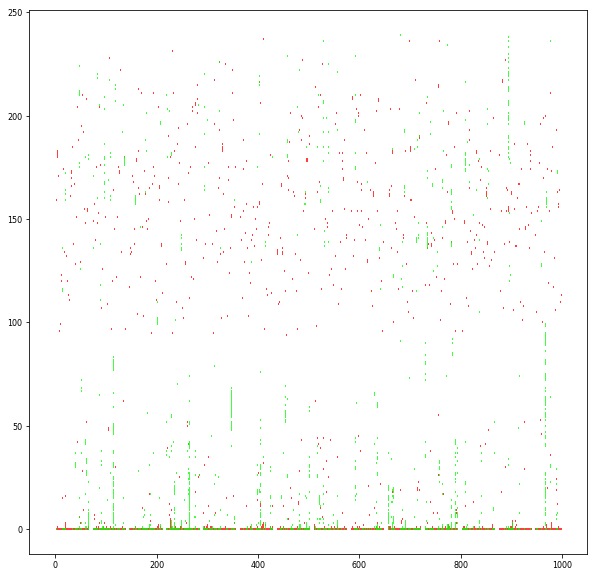

In [284]:
#myPlot([getSampleData(1, 1000) for i in range(9)])
mySinglePlot(getSampleData(1,1000))